In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [6]:
data=pd.read_csv(r'C:\Users\91877\Downloads\Diwali Sales Data.csv', encoding= 'unicode_escape')

In [8]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## To Know the shape of the sheet

In [10]:
data.shape

(11251, 15)

# Data Cleaning

## Remove all Nun file

In [13]:
nan_df = data[data.isna().any(axis=1)]
data = data.dropna(how='all')
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Drop unwanted column

In [14]:
data.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [16]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


# Rename Character from The specific column

In [20]:
data['Marital_Status'] = data['Marital_Status'].astype(str)
data['Marital_Status'] = data['Marital_Status'].str.replace('0', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('1', 'Married')

In [21]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


In [22]:
data['Gender'] = data['Gender'].str.replace('F', 'Female')
data['Gender'] = data['Gender'].str.replace('M', 'Male')

In [23]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


# Data Exploration

## 1. Which Product are most selling?

In [84]:
average_prices = data.groupby('Product_Category')['Amount'].sum().reset_index()
highest_average_price_brand = average_prices.loc[average_prices['Amount'].idxmax()]
print(highest_average_price_brand['Product_Category'],", Seems the highest puruchaser with the highest amount.", )

Food , Seems the highest puruchaser with the highest amount.


## 2. Which are the Top 10 products by sales?

In [65]:
product_sales = data.groupby('Product_Category')['Amount'].sum().reset_index()
sorted_product_sales = product_sales.sort_values(by='Amount', ascending=False)
top_1_categories = sorted_product_sales.head(10)
print(top_1_categories)

         Product_Category       Amount
6                    Food  33933883.50
3      Clothing & Apparel  16495019.00
5   Electronics & Gadgets  15643846.00
7        Footwear & Shoes  15575209.45
8               Furniture   5440051.99
9            Games & Toys   4331694.00
14        Sports Products   3635933.00
1                  Beauty   1959484.00
0                    Auto   1958609.99
15             Stationery   1676051.50


## 3. Total sale by Product Category

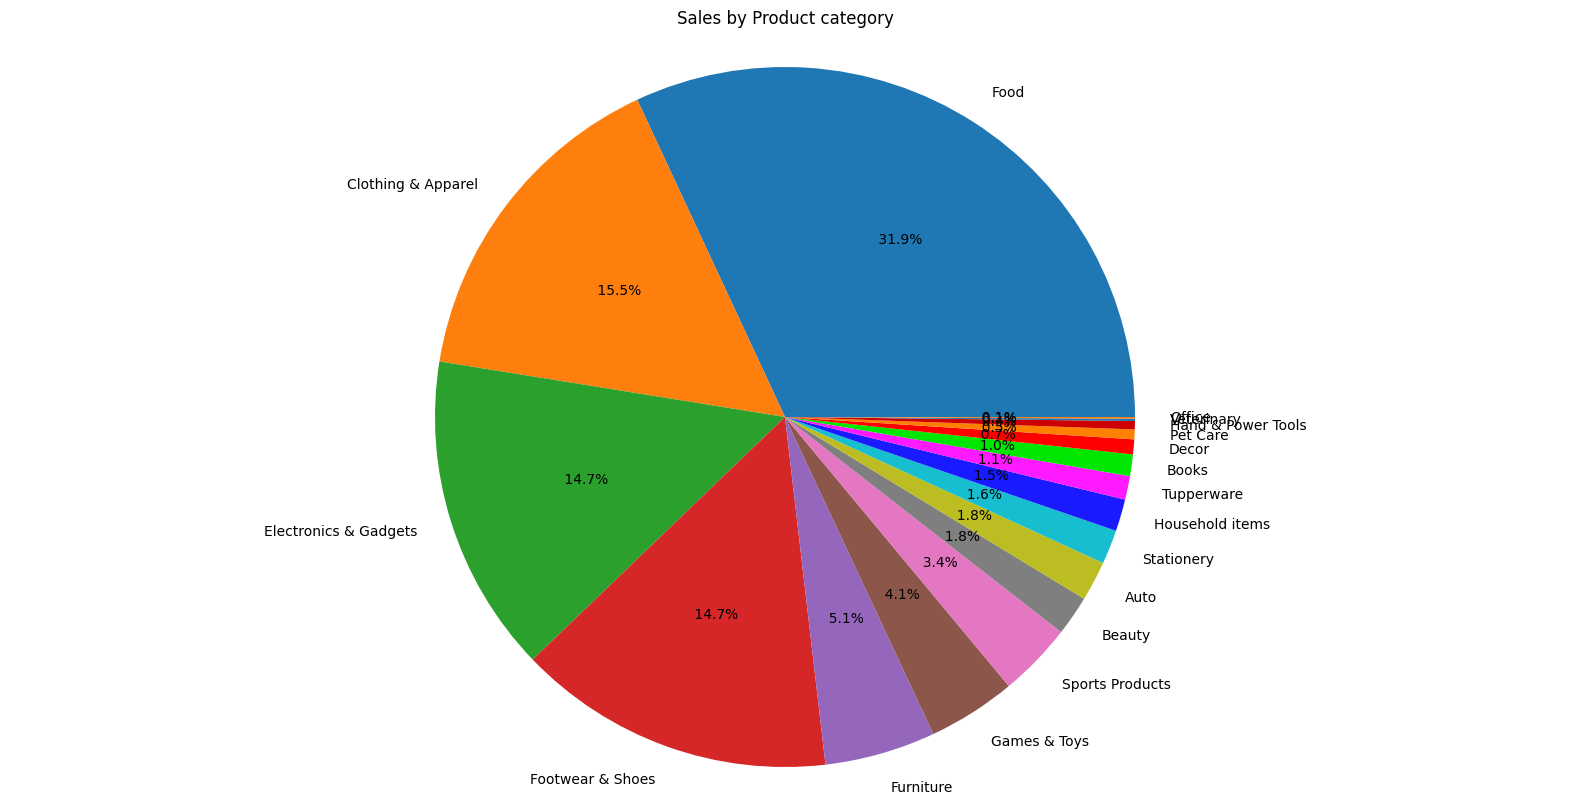

In [54]:
sales_by_region = data.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%5.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1a1aff', '#ff1aff', '#00e600', '#ff0000', '#ff8000', '#cc0000'])
plt.axis('equal')
plt.title('Sales by Product category')
plt.show()

## 4) Average Consumption of Products by Zone and State

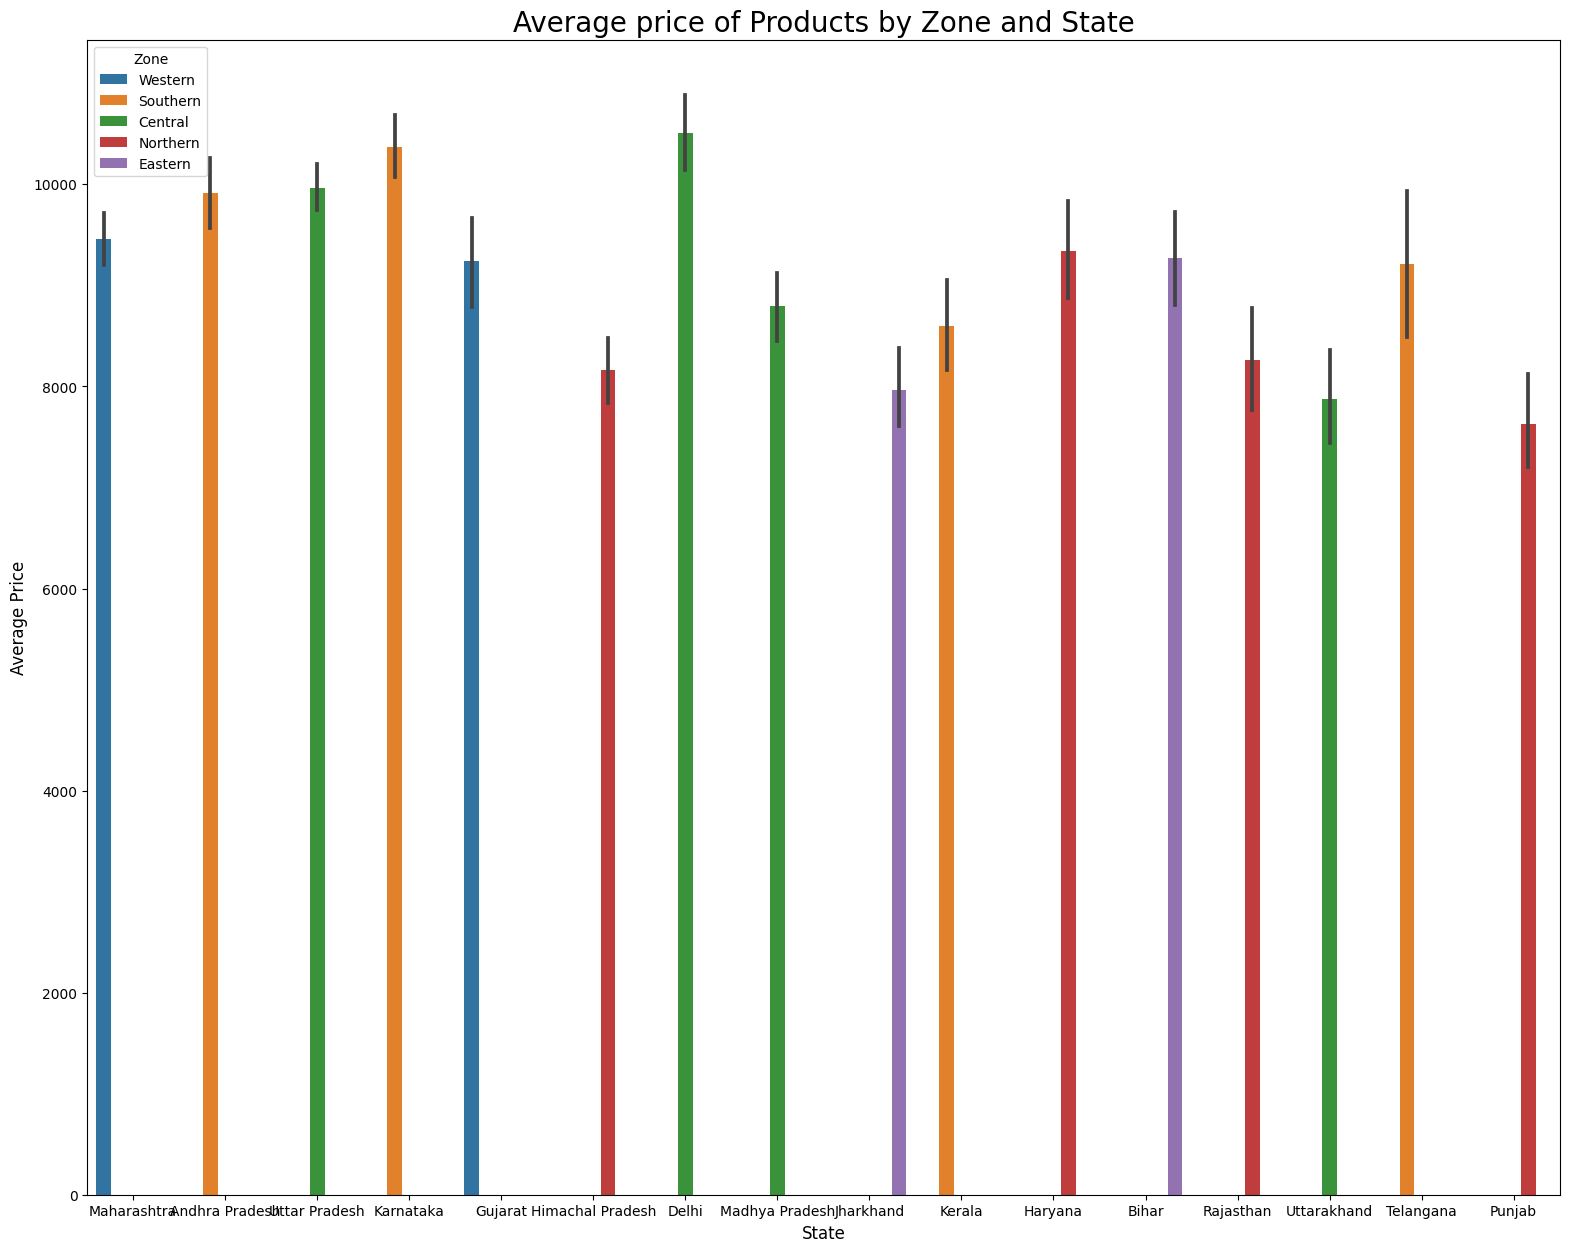

In [68]:
fig, ax = plt.subplots(figsize=(19,15))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
sns.barplot(x="State", y="Amount",hue="Zone", palette=colors, data=data)
ax.set_title("Average price of Products by Zone and State",fontdict= {'size':20})
ax.xaxis.set_label_text("State",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.show()

## 5) Total amount of sale by State

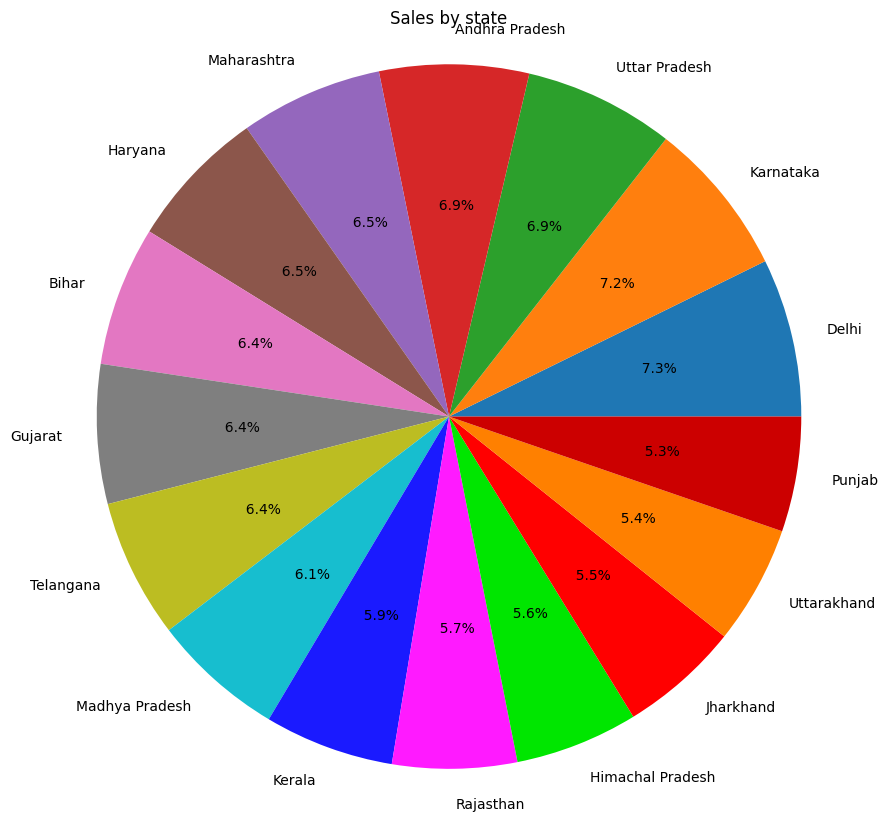

In [70]:
sales_by_region = data.groupby('State')['Amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct='%5.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1a1aff', '#ff1aff', '#00e600', '#ff0000', '#ff8000', '#cc0000'])
plt.axis('equal')
plt.title('Sales by state')
plt.show()

## 6) Zone with the puruchaser has highest average price

In [73]:
average_prices = data.groupby('Zone')['Amount'].mean().reset_index()
highest_average_price_brand = average_prices.loc[average_prices['Amount'].idxmax()]
print(highest_average_price_brand['Zone'],", States seems the highest puruchaser with the highest average price:", )

Southern , States seems the highest puruchaser with the highest average price:


## 7) To know the Maximum, Average, Minimum amount of each category

In [90]:
from ipywidgets import interact  # Import the interact decorator
import pandas as pd

a=input('''Average of each section 
    1) Gender 
    2) Age 
    3) Marital_Status 
    4) State 
    5) Zone 
    6) Occupation 
    7) Product_Category
    ''')
@interact
def summary(Price=list(data[a].value_counts().index)):
    x = data[data[a] == Price]
    print("-------------------------")
    print(x[ 'Amount'].mean(),"is the average value ")
    print(x[ 'Amount'].min(),"is the minimum value ")
    print(x[ 'Amount'].max(),"is the maximum value ")

Average of each section 
    1) Gender 
    2) Age 
    3) Marital_Status 
    4) State 
    5) Zone 
    6) Occupation 
    7) Product_Category
     Occupation


interactive(children=(Dropdown(description='Price', options=('IT Sector', 'Healthcare', 'Aviation', 'Banking',…

## 8. Demonstrate the average price of vehicles by State,Occupation and Amount by Heatmap

In [88]:
trial = pd.DataFrame()
for b in list(data["Occupation"].unique()):
    for v in list(data["State"].unique()):
        z = data[(data["Occupation"] == b) & (data["State"] == v)]["Amount"].mean()
        temp_df = pd.DataFrame({'Occupation': [b], 'State': [v], 'avgPrice': [z]})
        trial = pd.concat([trial, temp_df], ignore_index=True)

trial["avgPrice"].fillna(0, inplace=True)

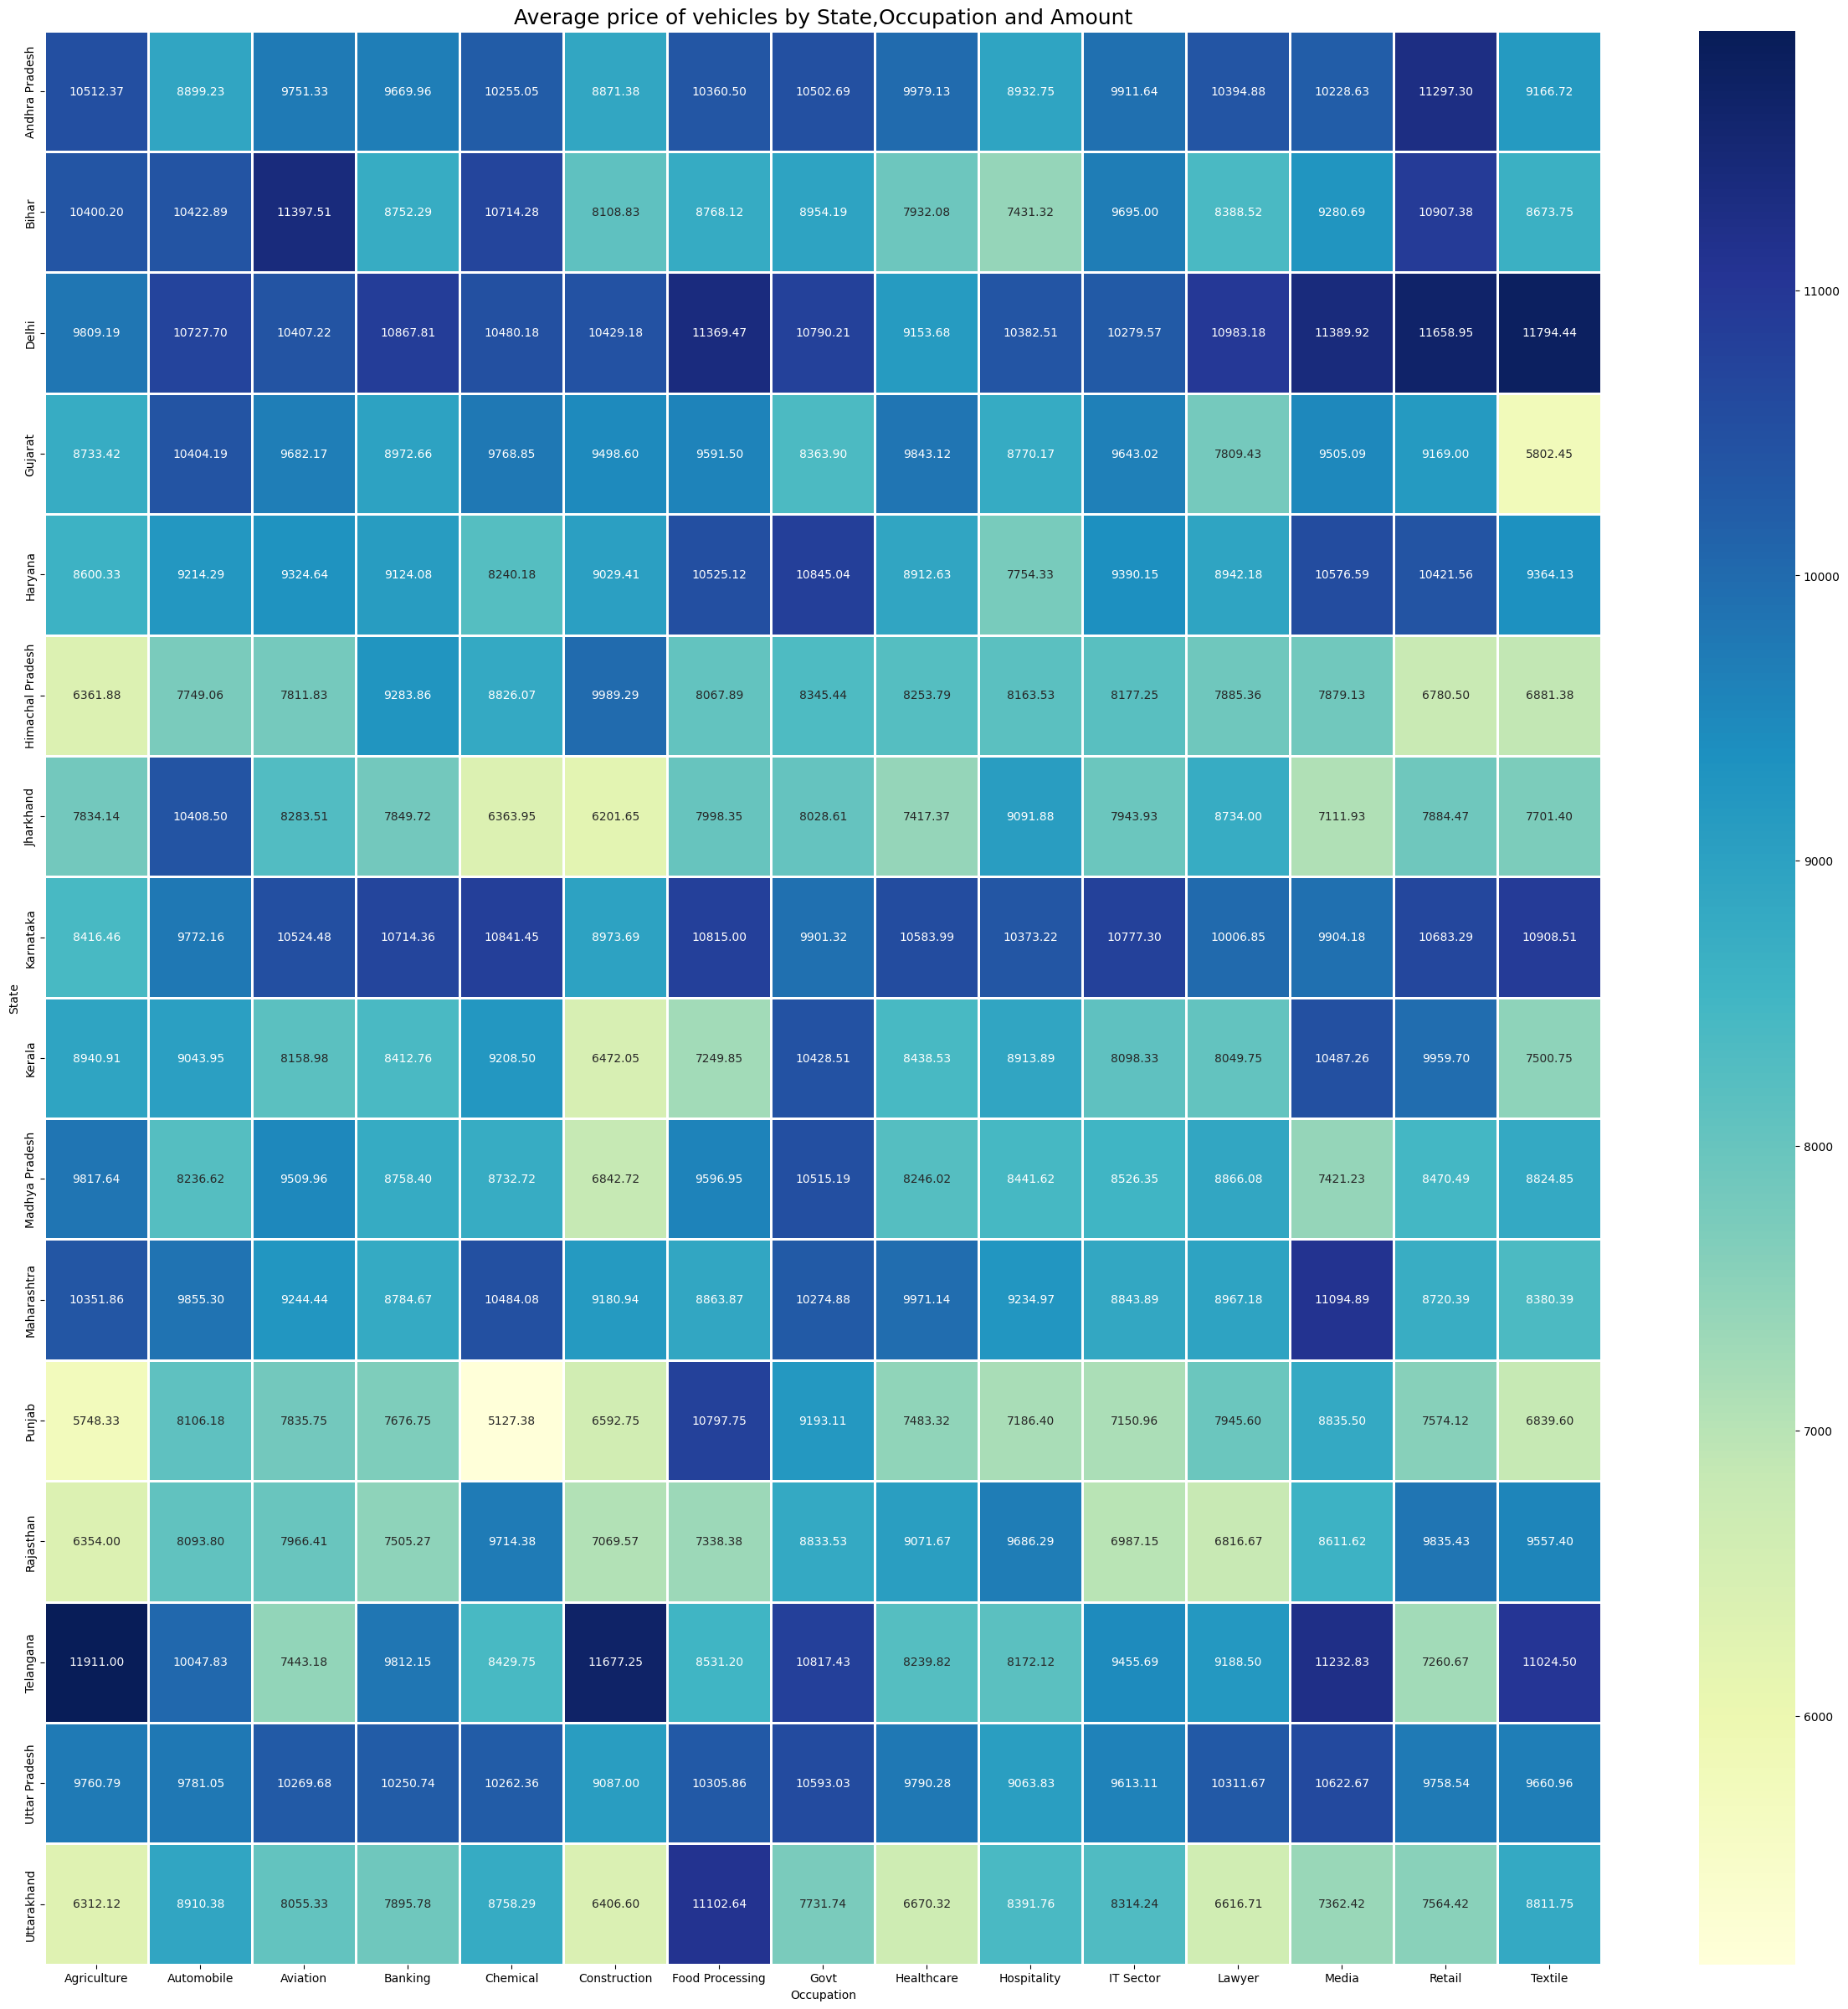

In [98]:
tri = trial.pivot(index="State", columns="Occupation", values="avgPrice")
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(tri, linewidths=1, cmap="YlGnBu", annot=True, ax=ax, fmt=".2f")
ax.set_title("Average price of vehicles by State,Occupation and Amount", fontdict={'size': 18})
plt.show()

## 9) The total amount of sale and average price

<Axes: title={'center': 'Average price of products based on gender'}, xlabel='Gender', ylabel='Amount'>

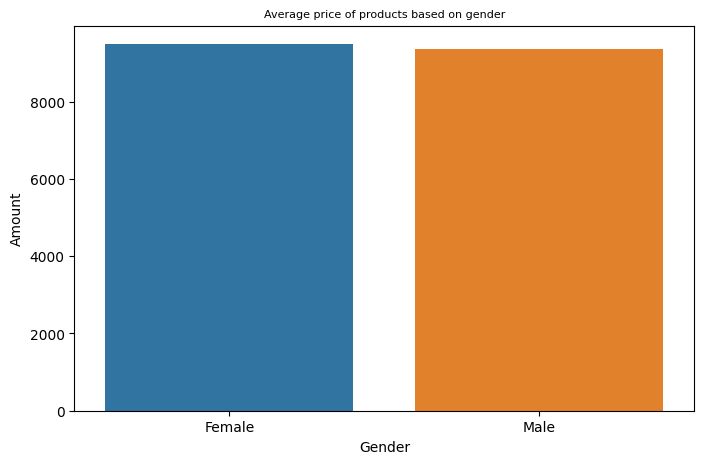

In [115]:
sales_gen = data.groupby(['Gender'], as_index=False)['Amount'].mean().sort_values(by='Amount', ascending=False)
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Average price of products based on gender", fontdict={'size': 8})
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

<Axes: title={'center': 'Total price of products based on gender'}, xlabel='Gender', ylabel='Amount'>

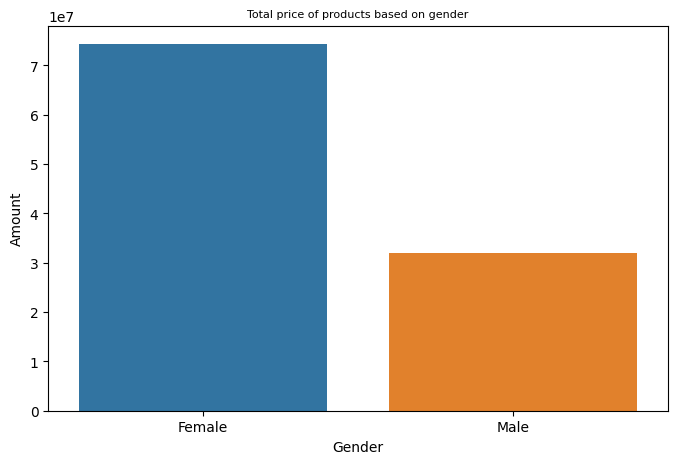

In [116]:
sales_gen = data.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Total price of products based on gender", fontdict={'size': 8})
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

## 10) Orders based on their states

<Axes: xlabel='State', ylabel='Orders'>

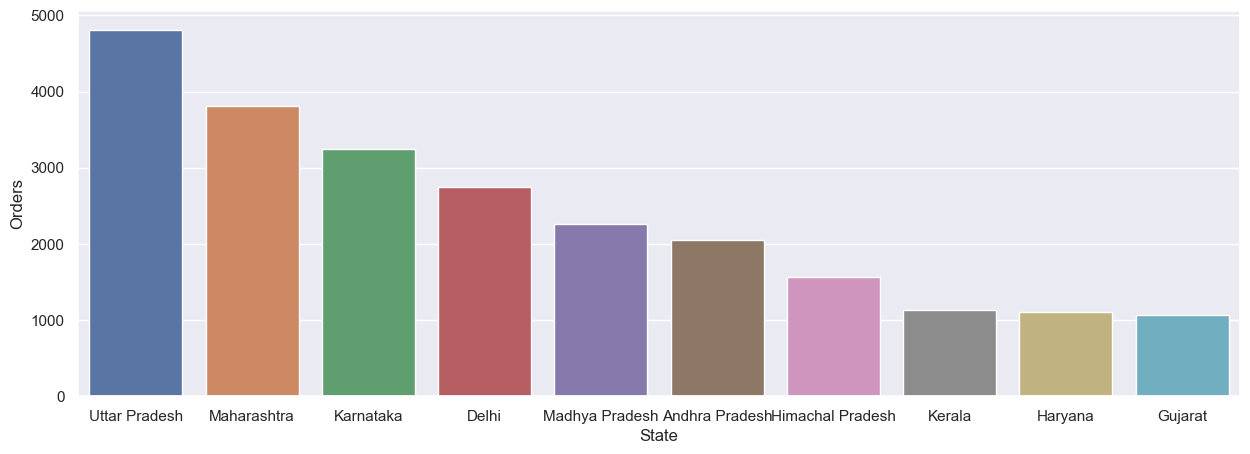

In [118]:
sales_state = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

## 11) Population of gender based on their age group

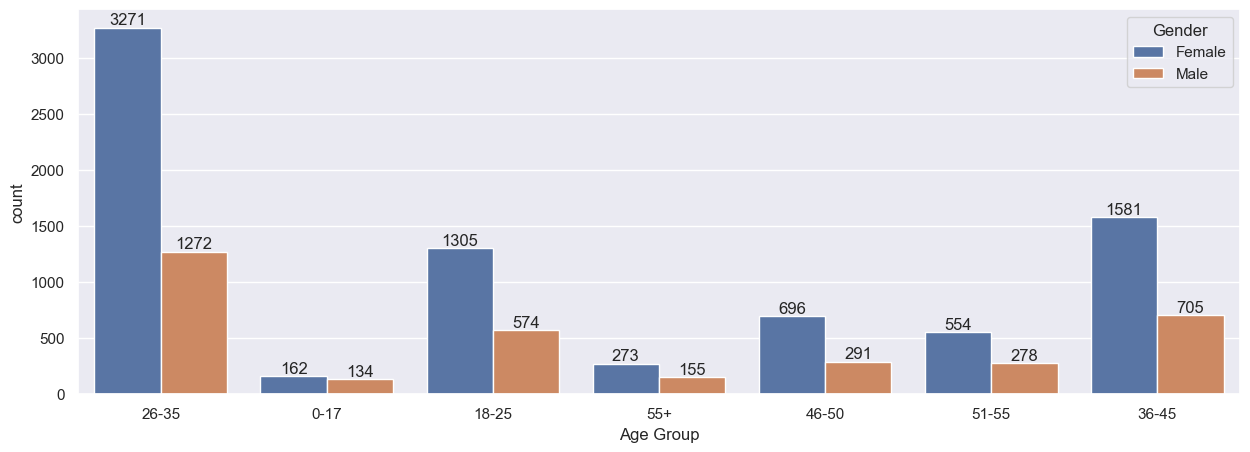

In [119]:
ax = sns.countplot(data = data, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

## 12) Occupation of the people

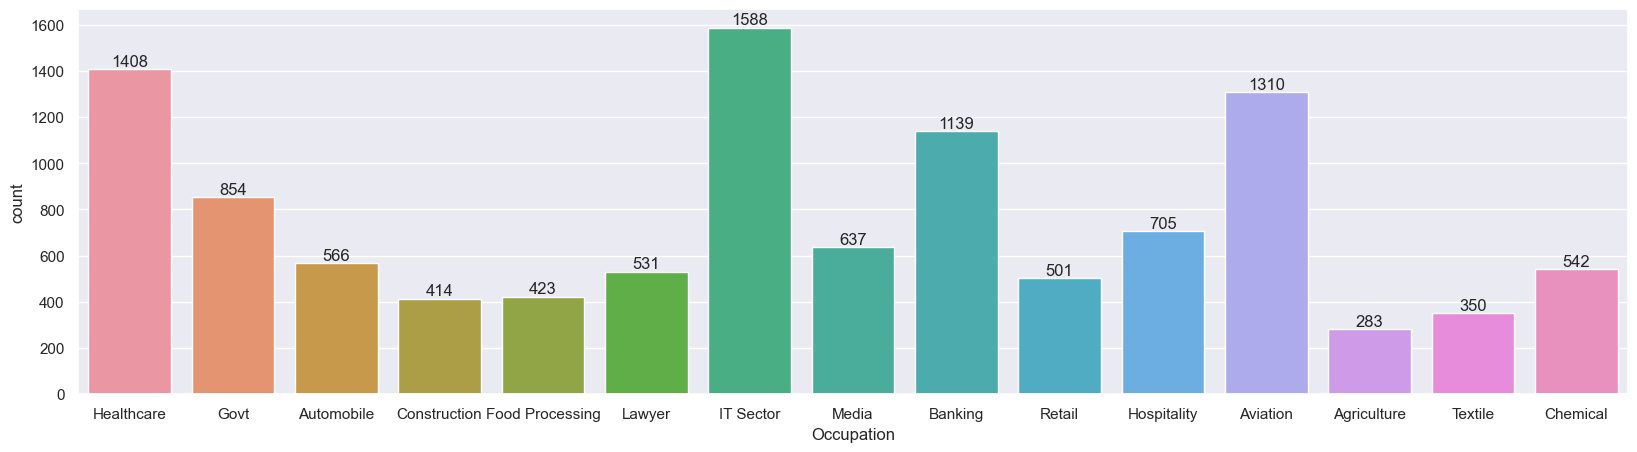

In [120]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = data, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

In [121]:
product_sales = data.groupby('Occupation')['Amount'].sum().reset_index()
sorted_product_sales = product_sales.sort_values(by='Amount', ascending=False)
top_1_categories = sorted_product_sales.head(10)
print(top_1_categories)

     Occupation       Amount
10    IT Sector  14755079.00
8    Healthcare  13034587.49
2      Aviation  12602298.00
3       Banking  10770610.95
7          Govt   8517212.00
9   Hospitality   6376405.00
12        Media   6295832.99
1    Automobile   5368596.00
4      Chemical   5297436.00
11       Lawyer   4981665.00
